In [1]:
!pip install xlrd

    100% |████████████████████████████████| 112kB 2.5MB/s 


# Data Import

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
       print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving DataCUSAAssgn1.xls to DataCUSAAssgn1.xls
User uploaded file "DataCUSAAssgn1.xls" with length 114176 bytes


In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [0]:
df = pd.read_excel("DataCUSAAssgn1.xls")

In [5]:
df.head()

,Srl No,V1 - I plan my expenses…,V2 - I always use new brands…,V3 - Weekends at home with family…,V4 - Buy more by impulse while shopping…,V5 - Watch online rather than TV shows,"V6 - Prefer reading, music rather than sports wctivities",V7 - Watch movies in first few days of release,V8 - I order for everyone while eating out,V9 - Some physical exercise everyday,...,Q2 - Mobile Phn Brand,Q3 - Favourite Soft Drink,Q4 - Newspaper read,Q5 - Shower Gel,Q6 - Hand sanitizers,Q7 - Face washes,Q8 - Hair conditioner,Q9 - Tea_Coffee,Q10 - Gender,Q11 - Occupation
0,1,4,9,4,6,9,8,9,8,8,...,Samsung,Cola,Economic Times,3,4,4,3,1,1,1
1,2,9,6,9,1,5,9,8,8,9,...,Others,Orange,The Hindu,1,2,2,3,1,1,1
2,3,4,6,5,7,6,5,0,5,3,...,HTC,Fruit flavour,Times of India,2,3,4,3,2,1,1
3,4,6,9,5,10,10,5,6,5,4,...,Others,I do not consume soft drinks at all,The Hindu,3,3,4,3,1,2,1
4,5,8,1,9,7,8,9,1,1,7,...,Others,Fruit flavour,Economic Times,2,3,2,2,1,1,1


In [6]:
df.shape

(400, 26)

In [7]:
df.columns.values

array(['Srl No', 'V1 - I plan my expenses…',
       'V2 - I always use new brands…',
       'V3 - Weekends at home with family…',
       'V4 - Buy more by impulse while shopping…',
       'V5 - Watch online rather than TV shows',
       'V6 - Prefer reading, music rather than sports wctivities',
       'V7 - Watch movies in first few days of release',
       'V8 - I order for everyone while eating out',
       'V9 - Some physical exercise everyday',
       'V10 - Prefer light, sober colours',
       'V11 - I discuss my problem, rather than keeping them to myself',
       'V12 - I like performing on a stage in front of a huge crowd',
       'V13 - At parties, I like mingling with new people rather than sticking to my close circle',
       'V14 - Math Science were my favourite subjects in school',
       'V15 - When I see a new, interesting ad I most often end up buying the brand',
       'Q2 - Mobile Phn Brand', 'Q3 - Favourite Soft Drink',
       'Q4 - Newspaper read', 'Q5 - Shower Gel

# Necessary Imports

In [0]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree
from scipy.stats import kde
from sklearn.metrics import silhouette_score, pairwise_distances

# Cluster Analysis 1 :

## For Mobile Phone Ownership

In [0]:
df_phone = df[['Srl No', 
       'V1 - I plan my expenses…',
       'V2 - I always use new brands…',
       'V4 - Buy more by impulse while shopping…',
       'V5 - Watch online rather than TV shows',
       'V6 - Prefer reading, music rather than sports wctivities',
       'V8 - I order for everyone while eating out',
       'V15 - When I see a new, interesting ad I most often end up buying the brand',
       'Q2 - Mobile Phn Brand'
      ]]

In [0]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [0]:
df_phone['Q2 - Mobile Phn Brand'] = le.fit_transform(df_phone['Q2 - Mobile Phn Brand'])

In [0]:
from  sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

df_phone = mm.fit_transform(df_phone.drop('Srl No', axis = 1))

In [0]:
df_phone = pd.DataFrame(df_phone, columns = ['V1 - I plan my expenses…',
       'V2 - I always use new brands…',
       'V4 - Buy more by impulse while shopping…',
       'V5 - Watch online rather than TV shows',
       'V6 - Prefer reading, music rather than sports wctivities',
       'V8 - I order for everyone while eating out',
       'V15 - When I see a new, interesting ad I most often end up buying the brand',
                                            'Q2 - Mobile Phn Brand'])

In [14]:
df_phone.head()

,V1 - I plan my expenses…,V2 - I always use new brands…,V4 - Buy more by impulse while shopping…,V5 - Watch online rather than TV shows,"V6 - Prefer reading, music rather than sports wctivities",V8 - I order for everyone while eating out,"V15 - When I see a new, interesting ad I most often end up buying the brand",Q2 - Mobile Phn Brand
0,0.4,0.9,0.6,0.9,0.8,0.8,0.7,0.857143
1,0.9,0.6,0.1,0.5,0.9,0.8,0.2,0.714286
2,0.4,0.6,0.7,0.6,0.5,0.5,0.3,0.142857
3,0.6,0.9,1.0,1.0,0.5,0.5,0.6,0.714286
4,0.8,0.1,0.7,0.8,0.9,0.1,0.2,0.714286


In [0]:
from sklearn.decomposition import PCA

p = PCA(n_components = 8)

In [0]:
df_pcs = pd.DataFrame(p.fit_transform(df_phone), columns = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8'])

In [0]:
df_overall = pd.concat([df_pcs, df_phone], axis = 1)

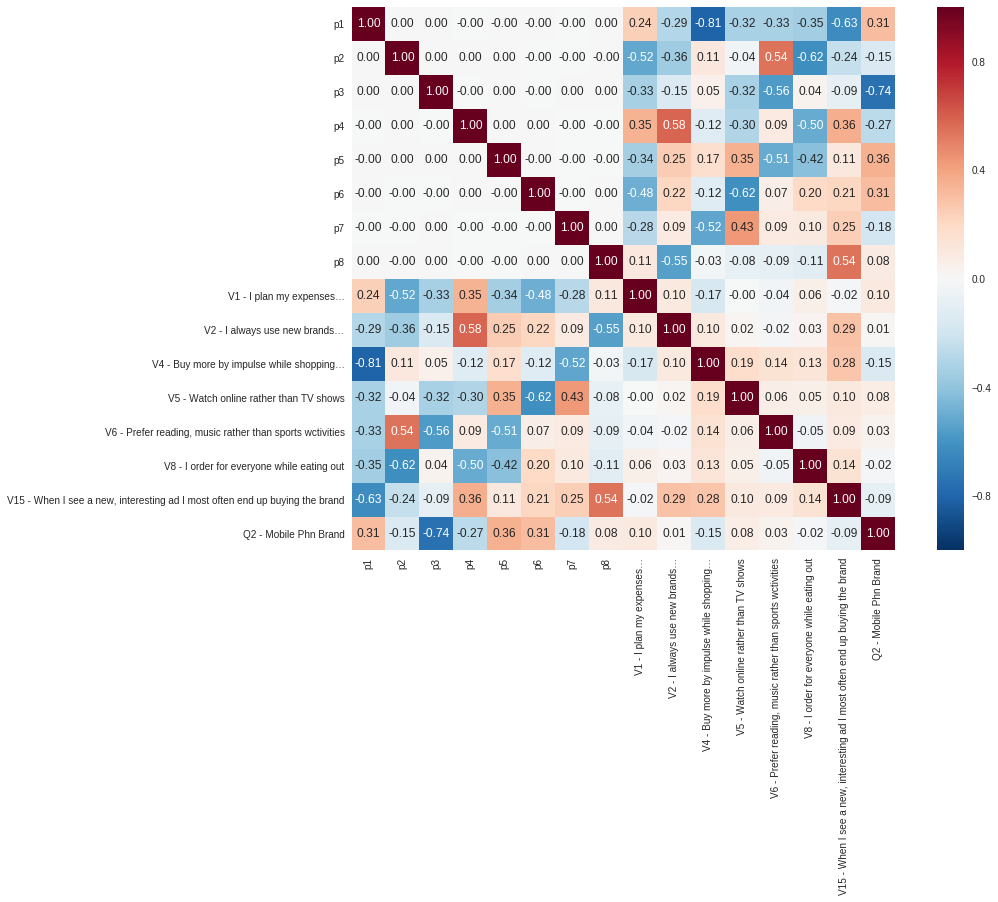

In [23]:
c = df_overall.corr()

sns.set(font_scale=0.8)
sns.set(rc={'figure.figsize':(15,10)})
heatmap = sns.heatmap(c, cbar=True, annot=True, square=True, fmt='.2f', 
                      yticklabels=df_overall.columns.values, xticklabels=df_overall.columns.values)

In [29]:
p.explained_variance_ratio_

array([0.2076631 , 0.1509153 , 0.14739905, 0.12224068, 0.11602425,
       0.10131541, 0.0839667 , 0.0704755 ])

In [34]:
round(0.2076631 + 0.1509153 + 0.14739905 + 0.12224068 + 0.11602425 + 0.10131541, 2)*100

85.0

**Explained Variances (Importance of a predictor / Important Drivers) For Mobile Phone Ownership :**

In [38]:
print("Relative Importance of V4 - Buy more by impulse while shopping…  : " )
print(round(0.2076631 * 0.81* 100))

print("Relative Importance of V15 - When I see a new, interesting ad I most often end up buying the brand  : " )
print(round(0.2076631 * 0.63 * 100))

print("Relative Importance of V8 - I order for everyone while eating out  : " )
print(round(0.1509153 * 0.62 * 100))

Relative Importance of V4 - Buy more by impulse while shopping…  : 
17
Relative Importance of V15 - When I see a new, interesting ad I most often end up buying the brand  : 
13
Relative Importance of V8 - I order for everyone while eating out  : 
9


In [0]:
df_work = df_phone[['V4 - Buy more by impulse while shopping…', 'V15 - When I see a new, interesting ad I most often end up buying the brand', 'V8 - I order for everyone while eating out','Q2 - Mobile Phn Brand']]

In [0]:
k_means = KMeans(n_clusters = 3, n_jobs = -1)

In [47]:
k_means.fit(df_work)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [48]:
print( 'Silhouette Score : ' + str(silhouette_score(df_phone, k_means.labels_)))

Silhouette Score : 0.14070661452955038


In [0]:
df_phone_back = mm.inverse_transform(df_phone)

In [0]:
df_phone_back = pd.DataFrame(df_phone_back, columns = ['V1 - I plan my expenses…',
       'V2 - I always use new brands…',
       'V4 - Buy more by impulse while shopping…',
       'V5 - Watch online rather than TV shows',
       'V6 - Prefer reading, music rather than sports wctivities',
       'V8 - I order for everyone while eating out',
       'V15 - When I see a new, interesting ad I most often end up buying the brand',
                                            'Q2 - Mobile Phn Brand'])

In [0]:
df_work = df_phone_back[['V4 - Buy more by impulse while shopping…', 'V15 - When I see a new, interesting ad I most often end up buying the brand', 'V8 - I order for everyone while eating out','Q2 - Mobile Phn Brand']]

In [0]:
df_work = pd.concat([df_work, pd.DataFrame(k_means.labels_, columns = ['Labels'])], axis = 1)

In [67]:
df_work.head()

,V4 - Buy more by impulse while shopping…,"V15 - When I see a new, interesting ad I most often end up buying the brand",V8 - I order for everyone while eating out,Q2 - Mobile Phn Brand,Labels
0,6.0,7.0,8.0,6.0,2
1,1.0,2.0,8.0,5.0,0
2,7.0,3.0,5.0,1.0,1
3,10.0,6.0,5.0,5.0,2
4,7.0,2.0,1.0,5.0,2


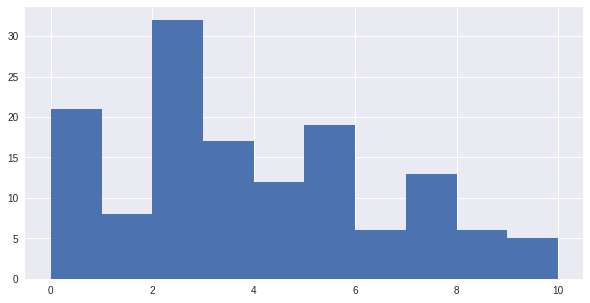

In [160]:
df_work[df_work['Labels']==0]['V15 - When I see a new, interesting ad I most often end up buying the brand'].hist()

In [75]:
df_work.head()

,V4 - Buy more by impulse while shopping…,"V15 - When I see a new, interesting ad I most often end up buying the brand",V8 - I order for everyone while eating out,Q2 - Mobile Phn Brand,Labels
0,6.0,7.0,8.0,6.0,2
1,1.0,2.0,8.0,5.0,0
2,7.0,3.0,5.0,1.0,1
3,10.0,6.0,5.0,5.0,2
4,7.0,2.0,1.0,5.0,2


In [0]:
df_work['Q2 - Mobile Phn Brand'] = le.inverse_transform(df_work['Q2 - Mobile Phn Brand'].apply(lambda x: int(x)))

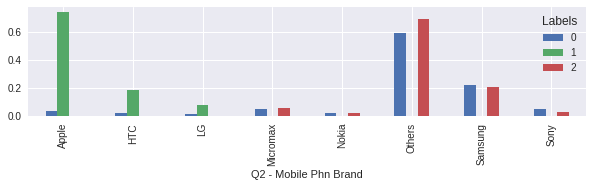

In [167]:
sns.set(font_scale=0.8)
sns.set(rc={'figure.figsize':(10, 2)})

df_p = df_work.groupby(['Q2 - Mobile Phn Brand', 'Labels']).size().unstack()
df_p.round()
df_p = df_p / df_p.sum()
df_p.plot(kind = 'bar')

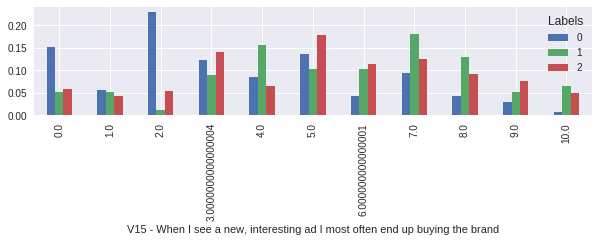

In [168]:


sns.set(font_scale=0.8)
sns.set(rc={'figure.figsize':(10, 2)})

df_p = df_work.groupby(['V15 - When I see a new, interesting ad I most often end up buying the brand', 'Labels']).size().unstack()
df_p.round()
df_p = df_p / df_p.sum()
df_p.plot(kind = 'bar')

In [132]:
centers

,V4 - Buy more by impulse while shopping…,"V15 - When I see a new, interesting ad I most often end up buying the brand",V8 - I order for everyone while eating out,Q2 - Mobile Phn Brand
0,0.216547,0.350360,0.512950,0.697842
1,0.725974,0.554545,0.602597,0.048237
2,0.778261,0.520652,0.600000,0.732919


In [158]:
centers.apply(lambda x: (x - 1)*100/9).abs().round()

,V4 - Buy more by impulse while shopping…,"V15 - When I see a new, interesting ad I most often end up buying the brand",V8 - I order for everyone while eating out,Q2 - Mobile Phn Brand
0,9.0,7.0,5.0,3.0
1,3.0,5.0,4.0,11.0
2,2.0,5.0,4.0,3.0


### Using Kernal PCA for linearly unseparable data

In [0]:
from sklearn.decomposition import PCA, KernelPCA

In [213]:
df_phone.shape

(400, 8)

In [0]:
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10, n_components = 14)
X_kpca = kpca.fit_transform(df_phone)

In [219]:
X_kpca.shape

(400, 14)

In [220]:
k_means.fit(X_kpca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [221]:
print( 'Silhouette Score : ' + str(silhouette_score(X_kpca, k_means.labels_)))

Silhouette Score : 0.48573694958933417


In [0]:
centers = pd.DataFrame(k_means.cluster_centers_)

In [0]:
Centers_Back = kpca.inverse_transform(centers)

In [224]:
Centers_Back.shape

(3, 8)

In [0]:
centers = pd.DataFrame(Centers_Back, columns = ['V1 - I plan my expenses…',
       'V2 - I always use new brands…',
       'V4 - Buy more by impulse while shopping…',
       'V5 - Watch online rather than TV shows',
       'V6 - Prefer reading, music rather than sports wctivities',
       'V8 - I order for everyone while eating out',
       'V15 - When I see a new, interesting ad I most often end up buying the brand',
       'Q2 - Mobile Phn Brand'])

In [226]:
centers.head()

,V1 - I plan my expenses…,V2 - I always use new brands…,V4 - Buy more by impulse while shopping…,V5 - Watch online rather than TV shows,"V6 - Prefer reading, music rather than sports wctivities",V8 - I order for everyone while eating out,"V15 - When I see a new, interesting ad I most often end up buying the brand",Q2 - Mobile Phn Brand
0,0.605510,0.575458,0.663477,0.813255,0.644600,0.642041,0.503748,0.694785
1,0.883256,0.699254,0.923881,0.997690,0.365612,0.590118,0.746394,0.845807
2,0.798862,0.472246,0.150260,0.841044,0.397299,0.652594,0.364884,0.823800


In [0]:
c_original = mm.inverse_transform(centers)

In [0]:
c_original = pd.DataFrame(c_original , columns = ['V1 - I plan my expenses…',
       'V2 - I always use new brands…',
       'V4 - Buy more by impulse while shopping…',
       'V5 - Watch online rather than TV shows',
       'V6 - Prefer reading, music rather than sports wctivities',
       'V8 - I order for everyone while eating out',
       'V15 - When I see a new, interesting ad I most often end up buying the brand',
       'Q2 - Mobile Phn Brand'])

In [229]:
c_original.round()

,V1 - I plan my expenses…,V2 - I always use new brands…,V4 - Buy more by impulse while shopping…,V5 - Watch online rather than TV shows,"V6 - Prefer reading, music rather than sports wctivities",V8 - I order for everyone while eating out,"V15 - When I see a new, interesting ad I most often end up buying the brand",Q2 - Mobile Phn Brand
0,6.0,6.0,7.0,8.0,6.0,6.0,5.0,5.0
1,9.0,7.0,9.0,10.0,4.0,6.0,7.0,6.0
2,8.0,5.0,2.0,8.0,4.0,7.0,4.0,6.0


In [0]:
d = mm.inverse_transform(df_phone)

In [0]:
d = pd.DataFrame(d , columns = ['V1 - I plan my expenses…',
       'V2 - I always use new brands…',
       'V4 - Buy more by impulse while shopping…',
       'V5 - Watch online rather than TV shows',
       'V6 - Prefer reading, music rather than sports wctivities',
       'V8 - I order for everyone while eating out',
       'V15 - When I see a new, interesting ad I most often end up buying the brand',
       'Q2 - Mobile Phn Brand'])

In [0]:
df_phone = pd.concat([d, pd.DataFrame(k_means.labels_, columns = ['Labels'])], axis = 1)

In [234]:
df_phone.head()

,V1 - I plan my expenses…,V2 - I always use new brands…,V4 - Buy more by impulse while shopping…,V5 - Watch online rather than TV shows,"V6 - Prefer reading, music rather than sports wctivities",V8 - I order for everyone while eating out,"V15 - When I see a new, interesting ad I most often end up buying the brand",Q2 - Mobile Phn Brand,Labels
0,4.0,9.0,6.0,9.0,8.0,8.0,7.0,6.0,0
1,9.0,6.0,1.0,5.0,9.0,8.0,2.0,5.0,0
2,4.0,6.0,7.0,6.0,5.0,5.0,3.0,1.0,0
3,6.0,9.0,10.0,10.0,5.0,5.0,6.0,5.0,1
4,8.0,1.0,7.0,8.0,9.0,1.0,2.0,5.0,0


In [236]:
df_phone['Q2 - Mobile Phn Brand'] = le.inverse_transform(df_phone['Q2 - Mobile Phn Brand'].apply(lambda x: int(x)))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


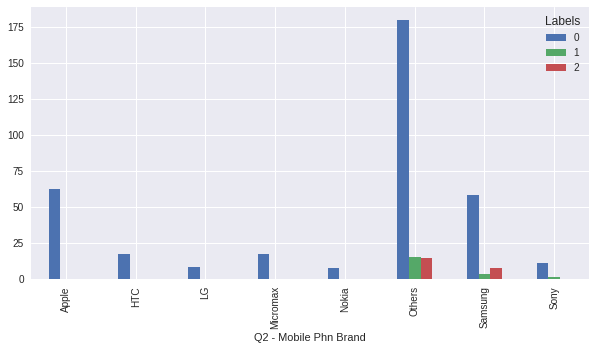

In [237]:
sns.set(font_scale=0.8)
sns.set(rc={'figure.figsize':(10,5)})

df_p = df_phone.groupby(['Q2 - Mobile Phn Brand', 'Labels']).size().unstack()
df_p.round()
#df_p = df_p / df_p.sum()
df_p.plot(kind = 'bar')

## For Soft Drink Preferences

In [0]:
df_drink = df[['V2 - I always use new brands…',
       'V3 - Weekends at home with family…',
       'V4 - Buy more by impulse while shopping…',
       'V6 - Prefer reading, music rather than sports wctivities',
       'V7 - Watch movies in first few days of release',
       'V9 - Some physical exercise everyday',
       'V15 - When I see a new, interesting ad I most often end up buying the brand', 'Q3 - Favourite Soft Drink']]

In [239]:
df_drink.head()

,V2 - I always use new brands…,V3 - Weekends at home with family…,V4 - Buy more by impulse while shopping…,"V6 - Prefer reading, music rather than sports wctivities",V7 - Watch movies in first few days of release,V9 - Some physical exercise everyday,"V15 - When I see a new, interesting ad I most often end up buying the brand",Q3 - Favourite Soft Drink
0,9,4,6,8,9,8,7,Cola
1,6,9,1,9,8,9,2,Orange
2,6,5,7,5,0,3,3,Fruit flavour
3,9,5,10,5,6,4,6,I do not consume soft drinks at all
4,1,9,7,9,1,7,2,Fruit flavour


In [240]:
from sklearn.preprocessing import LabelEncoder
le2 = LabelEncoder()

df_drink['Q3 - Favourite Soft Drink'] = le2.fit_transform(df_drink['Q3 - Favourite Soft Drink'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [0]:
from  sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

df_drink = pd.DataFrame(mm.fit_transform(df_drink))


In [0]:
k_means = KMeans(n_clusters = 3, n_jobs = -1)

In [243]:
k_means.fit(df_drink)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [244]:
print( 'Silhouette Score : ' + str(silhouette_score(df_drink, k_means.labels_)))

Silhouette Score : 0.14478872586290106


# Basic EDA

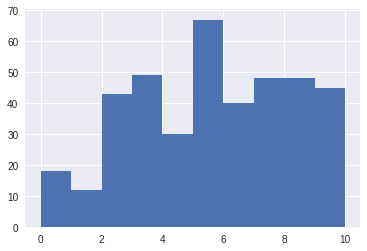

In [10]:
df['V2 - I always use new brands…'].hist()